In [2]:
from HMM import unsupervised_HMM
from Utility import Utility
import numpy as np
import re
txt = open('data/shakespeare.txt').readlines()
pumptxt = open('liliam_pumpernickel.txt').readlines()
txt = txt + pumptxt
print(txt)

['                   1\n', 'From fairest creatures we desire increase,\n', "That thereby beauty's rose might never die,\n", 'But as the riper should by time decease,\n', 'His tender heir might bear his memory:\n', 'But thou contracted to thine own bright eyes,\n', "Feed'st thy light's flame with self-substantial fuel,\n", 'Making a famine where abundance lies,\n', 'Thy self thy foe, to thy sweet self too cruel:\n', "Thou that art now the world's fresh ornament,\n", 'And only herald to the gaudy spring,\n', 'Within thine own bud buriest thy content,\n', "And tender churl mak'st waste in niggarding:\n", '  Pity the world, or else this glutton be,\n', "  To eat the world's due, by the grave and thee.\n", '\n', '\n', '                   2\n', 'When forty winters shall besiege thy brow,\n', "And dig deep trenches in thy beauty's field,\n", "Thy youth's proud livery so gazed on now,\n", 'Will be a tattered weed of small worth held:\n', 'Then being asked, where all thy beauty lies,\n', 'Where

In [3]:
sonnets = []
j = 1
song = []
for i in range(len(txt)):
    line = txt[i]
    arr = [str(j)]
    empt = []
    if line.split() == arr:
        if song != []:
            sonnets.append(song)
        song = []
        j += 1
    else:
        song.append(line)

print(sonnets)
        
i = 0
words = {}
for sonnet in sonnets:
    for line in sonnet:
        line = re.sub('[;,:?!.\(\)]', '', line).lower()
        for word in line.split():
            if (word not in words.keys()):
                words[word] = i
                i += 1

son_dat = []
son_words = []
for sonnet in sonnets:
    temp = []
    temp2 = []
    for line in sonnet:
        line = re.sub('[;,:?!.\(\)]', '', line).lower()
        for word in line.split():
            temp.append(words[word])
            temp2.append(word)
    son_dat.append(temp)
    son_words.append(temp2)
    
flat = []
for liste in son_words:
    for item in liste:
        flat.append(item)
son_words = flat
    
for ele in (son_dat):
    print(ele)
    print('')
    
inv_map = {v: k for k, v in words.items()}

[['From fairest creatures we desire increase,\n', "That thereby beauty's rose might never die,\n", 'But as the riper should by time decease,\n', 'His tender heir might bear his memory:\n', 'But thou contracted to thine own bright eyes,\n', "Feed'st thy light's flame with self-substantial fuel,\n", 'Making a famine where abundance lies,\n', 'Thy self thy foe, to thy sweet self too cruel:\n', "Thou that art now the world's fresh ornament,\n", 'And only herald to the gaudy spring,\n', 'Within thine own bud buriest thy content,\n', "And tender churl mak'st waste in niggarding:\n", '  Pity the world, or else this glutton be,\n', "  To eat the world's due, by the grave and thee.\n", '\n', '\n'], ['When forty winters shall besiege thy brow,\n', "And dig deep trenches in thy beauty's field,\n", "Thy youth's proud livery so gazed on now,\n", 'Will be a tattered weed of small worth held:\n', 'Then being asked, where all thy beauty lies,\n', 'Where all the treasure of thy lusty days;\n', 'To say 

[1015, 37, 107, 1092, 165, 1885, 324, 490, 1886, 14, 28, 542, 1566, 41, 1887, 1888, 56, 1889, 207, 1890, 68, 1891, 56, 1892, 1893, 1894, 1895, 56, 1670, 601, 1896, 1897, 56, 700, 1664, 1898, 1899, 56, 1497, 654, 1900, 1901, 56, 908, 18, 1902, 1903, 1904, 56, 51, 141, 1905, 18, 1906, 56, 511, 1907, 835, 717, 56, 1908, 641, 1909, 1910, 56, 1911, 618, 361, 1629, 891, 1015, 37, 107, 1092, 0, 1092, 517, 490, 76, 233, 577, 6, 28, 12, 490, 237, 133, 460, 230]

[434, 690, 37, 1912, 17, 173, 193, 56, 37, 21, 493, 946, 1913, 6, 1813, 18, 268, 1850, 17, 1914, 56, 1915, 146, 46, 37, 21, 1916, 200, 17, 823, 1829, 1917, 21, 1649, 56, 1306, 1140, 423, 100, 21, 329, 833, 200, 17, 988, 108, 1918, 1572, 1258, 100, 1034, 568, 21, 9, 153, 397, 200, 17, 173, 193, 52, 232, 1919, 153, 1920, 100, 143, 28, 1921, 186, 1922, 1923, 165, 166, 455, 287, 1924, 52, 13, 21, 56, 92, 100, 422, 243, 202, 21, 1925, 487, 268, 166, 1926, 28, 297, 234, 1103, 166, 610, 68, 111, 777, 568, 685, 1092, 1927, 94, 1928]

[1042, 153

In [30]:
#mind = 100000000
#for dat in son_dat:
#    if len(dat) < mind:
#        mind  = len(dat)
#for i in range(len(son_dat)):
#    son_dat[i] = son_dat[i][0:mind]
#print(words)
#for ele in son_dat:
#    print(len(ele))

In [4]:
def unsupervised_learning2(n_states, N_iters):
    '''
    Trains an HMM using supervised learning on the file 'ron.txt' and
    prints the results.

    Arguments:
        n_states:   Number of hidden states that the HMM should have.
    '''
    genres, genre_map = son_dat, words
    
    # Train the HMM.        
    HMM = unsupervised_HMM(genres, n_states, N_iters)

    # Print the transition matrix.
    print("Transition Matrix:")
    print('#' * 70)
    for i in range(len(HMM.A)):
        print(''.join("{:<12.3e}".format(HMM.A[i][j]) for j in range(len(HMM.A[i]))))
    print('')
    print('')

    # Print the observation matrix. 
    print("Observation Matrix:  ")
    print('#' * 70)
    for i in range(len(HMM.O)):
        print(''.join("{:<12.3e}".format(HMM.O[i][j]) for j in range(len(HMM.O[i]))))
    print('')
    print('')
    return HMM.A, HMM.O, HMM

In [5]:
    print('')
    print('')
    print('#' * 70)
    print("{:^70}".format("Running Code For Question 2D"))
    print('#' * 70)
    print('')
    print('')
    A1, O1, HMM = unsupervised_learning2(8, 50)



######################################################################
                     Running Code For Question 2D                     
######################################################################


Transition Matrix:
######################################################################
9.116e-03   6.887e-13   1.991e-01   4.574e-16   2.325e-01   5.698e-15   3.975e-07   5.593e-01   
6.032e-11   8.155e-01   1.652e-02   8.380e-02   1.358e-20   7.238e-02   6.574e-18   1.179e-02   
1.838e-22   2.705e-13   1.013e-02   5.590e-17   6.845e-25   9.886e-01   1.771e-17   1.296e-03   
3.922e-28   7.464e-16   1.404e-01   9.935e-30   5.457e-15   9.611e-20   8.596e-01   1.622e-32   
3.251e-01   2.255e-25   2.973e-01   2.265e-01   6.247e-24   4.012e-21   1.510e-01   5.425e-15   
4.746e-01   7.025e-02   4.551e-01   1.970e-15   5.554e-25   5.433e-23   7.098e-28   1.627e-16   
1.378e-23   9.192e-02   5.685e-34   6.668e-01   6.169e-19   4.035e-14   2.178e-40   2.413e-01   
1.341e-02   5.

2.449e-03   2.544e-03   0.000e+00   0.000e+00   2.282e-03   0.000e+00   2.718e-03   0.000e+00   0.000e+00   0.000e+00   3.145e-77   5.087e-03   5.087e-03   3.104e-03   8.250e-55   3.509e-123  0.000e+00   0.000e+00   1.704e-213  7.279e-22   0.000e+00   7.875e-03   2.544e-03   0.000e+00   1.694e-172  2.872e-06   2.665e-87   0.000e+00   1.107e-48   1.252e-18   0.000e+00   0.000e+00   2.544e-03   0.000e+00   2.681e-03   0.000e+00   1.966e-42   3.292e-22   0.000e+00   0.000e+00   2.738e-03   2.343e-02   0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00   8.454e-03   0.000e+00   0.000e+00   4.478e-149  2.553e-222  0.000e+00   0.000e+00   0.000e+00   1.599e-02   0.000e+00   0.000e+00   0.000e+00   0.000e+00   2.544e-03   0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00   2.544e-03   2.678e-03   0.000e+00   0.000e+00   8.190e-03   2.544e-03   0.000e+00   2.277e-43   0.000e+00   1.842e-31   0.000e+00   0.000e+00   0.000e+00   4.779e-26   2.432e-02   0.000e+00   0.00

In [34]:
from HMM import HiddenMarkovModel
from Utility import Utility

def sequence_generator(A, O, k, M):
    '''
    Generates k emissions of length M using the HMM stored in the file
    'sequence_data<n>.txt' for a given n and prints the results.

    Arguments:
        N:          File index.
        K:          Number of sequences to generate.
        M:          Length of emission to generate.
    '''


    # Generate k input sequences.
    for i in range(k):
        # Initialize an HMM.
        HMM = HiddenMarkovModel(A, O)

        # Generate a single input sequence of length m.
        emission, states = HMM.generate_emission(M)
        x = ' '.join([inv_map[i] for i in emission])
        
        # Print the results.
        print("{:30}".format(x))

    print('')
    print('')


print('')
print('')
print("#" * 70)
print("{:^70}".format("Running Code For Question 2F"))
print("#" * 70)
print('')
print('')

sequence_generator(A1, O1, 14, 10)



######################################################################
                     Running Code For Question 2F                     
######################################################################


let gucci chain doth pills everybody who make my rose
ass use shall curse missed time stripper truth pop no
day going return in your to nature's she self with
he need popped me thou who oppression babe at designer
part how life and wife this d sweetness that against
the than to thee their strength receives sad that note
should by is the a got and nuh-uh hoes day
face nothing i day bitch spent because more pale and
scoot a bears in my yeah top past ooh ring
of tired me i so memory creation much me thou
that ever know right would leave it's d all-tyrant in
leave thou as youth's should i alters thought destroys did
two then you my mine o done in the whip
corvette habitation thither on hems be truth buy you sinful




In [154]:
inv_map

{0: 'from',
 1: 'fairest',
 2: 'creatures',
 3: 'we',
 4: 'desire',
 5: 'increase,',
 6: 'that',
 7: 'thereby',
 8: "beauty's",
 9: 'rose',
 10: 'might',
 11: 'never',
 12: 'die,',
 13: 'but',
 14: 'as',
 15: 'the',
 16: 'riper',
 17: 'should',
 18: 'by',
 19: 'time',
 20: 'decease,',
 21: 'his',
 22: 'tender',
 23: 'heir',
 24: 'bear',
 25: 'memory:',
 26: 'thou',
 27: 'contracted',
 28: 'to',
 29: 'thine',
 30: 'own',
 31: 'bright',
 32: 'eyes,',
 33: "feed'st",
 34: 'thy',
 35: "light's",
 36: 'flame',
 37: 'with',
 38: 'self-substantial',
 39: 'fuel,',
 40: 'making',
 41: 'a',
 42: 'famine',
 43: 'where',
 44: 'abundance',
 45: 'lies,',
 46: 'self',
 47: 'foe,',
 48: 'sweet',
 49: 'too',
 50: 'cruel:',
 51: 'art',
 52: 'now',
 53: "world's",
 54: 'fresh',
 55: 'ornament,',
 56: 'and',
 57: 'only',
 58: 'herald',
 59: 'gaudy',
 60: 'spring,',
 61: 'within',
 62: 'bud',
 63: 'buriest',
 64: 'content,',
 65: 'churl',
 66: "mak'st",
 67: 'waste',
 68: 'in',
 69: 'niggarding:',
 70: 'pi

In [182]:
'''
#Example script to generate text from Nietzsche's writings.
At least 20 epochs are required before the generated text
starts sounding coherent.
It is recommended to run this script on GPU, as recurrent
networks are quite computationally intensive.
If you try this script on new data, make sure your corpus
has at least ~100k characters. ~1M is better.
'''

from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

text = ' '.join(son_words)

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback])

total chars: 37
nb sequences: 31196
Vectorization...
Build model...
Epoch 1/60
31196/31196 [==============================] - 14s 433us/step - loss: 2.3715

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "y power to lend base subjects light? ret"
y power to lend base subjects light? ret thy sell thy son thy son thy sond thou the the the thit sthing thy son thy sond thy so the the so stor thy son thy so stor thy sor the the the the the the the that thy seatt thy sor thy sond thy so the to thy so thy son thy sond thy shat thy sore thy sond shat thy sonst thy so whe the the to thy shat thy sor thy shat that the the the thit thy statt the the the sunt thy son thy sond whit thou that
----- diversity: 0.5
----- Generating with seed: "y power to lend base subjects light? ret"
y power to lend base subjects light? ret wor in thy beas i hat thei thit thy shat whing in that by stor i thy shy so whe thit thy shath thou thy to at, to the to thy mint the  ank t

 their own presage, incertainties now crnstare the stars as thou the stars as the stars of thee thou thy self are in the surf thou thy self all the sunst and the subling stand the summer's shadow strang thee the summerts their statter still the sunst and still the world their beauty shand doth stand their beauty should the self the sunst thou thy self are in the subling stars the summer's shall beauty self thy self thy self thy self thy
----- diversity: 0.5
----- Generating with seed: " their own presage, incertainties now cr"
 their own presage, incertainties now crass in their contrit of thy self all the heart shorth their brain fair as is stare so it which then thy sour trounks desire them with my love hast his spirit and seem the thing the with their beauty speem they the doth then it sups at so fall cann stare ince the world their stath far the subling of the fair fair eyes of me thoughts of thy self it it thoughts of thy stast would the such a doth thy 
----- diversity: 1.0
-----

he dead, which now appear, but things reserve to make thee some in thee sad stongue thee sonce so it, then the lies be the self to be to thy swort thee, and thou to gust the shalt but the world many, self thy sweet self thy should checked thy sweet self thy sunfents of thy heart, then that which should black, and thee standen thee spitin, still the thee ad. but thou art the self thy sunfenties of lead, leave love her pied, to thee of th
----- diversity: 0.5
----- Generating with seed: "he dead, which now appear, but things re"
he dead, which now appear, but things remeny, to thy self to be good conserning stars, to the every thou dost thou art one thee sadithan the lies, to lase love have lore thy self to thy sweet self to gusters of better which widough my life be not the const since in thy sunferts brow hase une knewpring, stare then shall by for my self art thou will be never fle thee spitifues shall agaie no seemon the shall thy self shall thou beauty's a
----- diversity: 1.0
-----

/Users/jacobsnyder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log


m dear mack woldsee's lies bud my swar'st, whing be is, quite, and kinf aud adt war's ftright: me souls forme, what hatterd if mery mect in t
Epoch 18/60
31196/31196 [==============================] - 14s 434us/step - loss: 1.0308

----- Generating text after Epoch: 17
----- diversity: 0.2
----- Generating with seed: "eart's guest, and in his thoughts of lov"
eart's guest, and in his thoughts of love and thine of foulds of thee. then should the fair with thee, where it me, where it be the with thee is sublie, and there is more the stars, and the shone i am threes of the sun a dreased be the starse the elfol a doth and heart that thou wilt which should truth thou be to beauty shame that which thou dost fals commexts and truth, and there is more the stars, and the should that wonks do i contai
----- diversity: 0.5
----- Generating with seed: "eart's guest, and in his thoughts of lov"
eart's guest, and in his thoughts of love another that love thee of all thour beauty strespare of thy lov

 cannot write to thee, when thou thy selvery hake and is my doth my love's do i love of moring stand partition doth theu when plould. which when to all hus from thee ass, agein groud your swietes and you love hand, whetherringdest of piriefout still and stand hide of thee mind be receives sing hame what summert's grilives ping mann say buthes by the day carace herse the summer's' till be the ofrenth. leth these bring toe, my hake buinds
----- diversity: 1.2
----- Generating with seed: " cannot write to thee, when thou thy sel"
 cannot write to thee, when thou thy selveing eyes, thy be twinter's griuds and to lest recelved crlamint be this gatwer hesst findul, thy self sweetn absind? me bare, truth i to lere shame love tskeetn sin see though my love thy love so they, see itirged), than groung no songulle with tingmest afforrept, to be npeds, y; love const thee. thou do strippays since i kilv's dosunit surrra's paise that twe thy nogereingbed, and strevery fle 
Epoch 22/60
31196/31196 [=

 thou dost common grow. that thou art blest creapess be thach beauty gace to me, i wool plesse so fail, and you ear keep in on the my featted learts seem being art the clow and life, that i amay, me blinse some reway self to man in heavenly , to prine, in peaysouses, when i not placed quinned not writgs the seet will be duthe cannot bles, and edurst, nor made the chained worsority chase aftiving best, time with ell thou than, in their h
----- diversity: 1.2
----- Generating with seed: " thou dost common grow. that thou art bl"
 thou dost common grow. that thou art black, and ppecious, three, phearenty sing-tongs ingst fortace this gring. but i dne, and muses desweep. sue, which must be: kence, but be thou downd, that somp says no gnver carmer wring, farthess ie, the doth ganoure than you wear as-upll must, combericlowilinks on, before than but whe deatume soplilion recervouat, thou thy loce shall be deed pape? whereher reseace, and many beautyeressing? doth a
Epoch 29/60
31196/31196 [=

n a living brow: before the golden tressean piter creepings on that minint must gaie when your serar with up eiath countle with their piture, resed not now my dumb nemped grent every verge. o ender but to your art me, seeit when hand your sweet see, with my latmery swail with my love lend, where all my heartjory's', they minds not true dorn truen, and for fame a some toke the world quich black not uthep hase strind, steel grink gove hav
----- diversity: 1.2
----- Generating with seed: "n a living brow: before the golden tress"
n a living brow: before the golden tresseande, andial fact well knows your gure-face, to siteth with my appedess by neirth well conder'sived they will, it under beauty fair deface, then that my wilgs you wealt to decter honcting deensouss, swearing on thy sedve's wint) not rough art worth's strength progiageeus of my add ighen fair i that too bralow to, mire shintle o'ell me to whene it gostne of tide. that those't bleath no surfed ligh
Epoch 36/60
31196/31196 [=

is perjured, murd'rous, bloody full of blame to hot thy usence hay, tormmerty, intainess who let from this sphiebstant in my boast wrownglo? spit do blong, 'tis love not fremst of duty yout straght: yet all my heart toons assemic, and seem what beauty lack, and for the weartd, whiltt i gure sweetes to the elact on you of a my passing part', by for my sumbers be)nsick would hand, all thy fastaces, ege. therefore of me, but sele are if yo
----- diversity: 1.2
----- Generating with seed: "is perjured, murd'rous, bloody full of b"
is perjured, murd'rous, bloody full of blame offly time. and care every wrass. so inclowings remeive than with hearts, to lasb have i put in gentle for my thoughts to be not, yet and wairs wilfounty'st, and by unure in their proiding of formned vaise, but all mine ewriw aud truth forstle, while to be face? who of the shantion forther how with find a fandes of crossway the stwad. then i dirn threes to wheme black, and hath trought of dec
Epoch 43/60
31196/31196 [=

of welfare found a kind of meetness, to hone eye's fice away, as inglllaces on the sease to come jops my argetent, to shore the will noth barred muse, and to put diser, blain, or chectess, his forme tha ugut to decay, to whem that where ear love to mothing thy love's endrefokit praise the see dreack on my very such shady, and stand stand give. our despates, tee misthers faithesh reasure i not all my friends must love you heartt in barn'
----- diversity: 1.2
----- Generating with seed: "of welfare found a kind of meetness, to "
of welfare found a kind of meetness, to lat, thou lov'st the veasencein and ince my bleady, oll grow she that pluming. so i thinviest unled''er tingst thou art my monneds more, nor me unse, nut then it is no grains of wrat which contrain as be thangermpatt when when i am invoung as yme. in thy bewace. when vatey where i gut me my gruefer's braces. to thee, of were dulmbe, though my bend, of gife as ploiner to whreling say, astege: anoth
Epoch 50/60
31196/31196 [=

h thy love sheds, and they are rich, and chired head they knegh besession, the still advine, if thou well, 'tis thy mounte stand, steal hum on i am, to leave my poest, in thou live rans winter, and whilst yet thim ilter. if time, when thou dost stars affourn, as'anceres ghess aftill must amor, and yet one ear weepnus chust the elose thy soul my self aw, lease which i look why though aft me, and tind, and ceares right, be who is idsher p
----- diversity: 1.2
----- Generating with seed: "h thy love sheds, and they are rich, and"
h thy love sheds, and they are rich, and wonch did things our days hing, and can my love's strags on day, and hease when posome, nor im on that you air aruse up alle. thy self thy self thy splate. for comb you owele all, to thee thy repartery on the elesses, send my healts of ell age allight; the of well hat watke with deceive have in love, but flese the which in noth. 'isboun arvery on thee, west though my cold as thy moon, do not depa
Epoch 57/60
31196/31196 [=

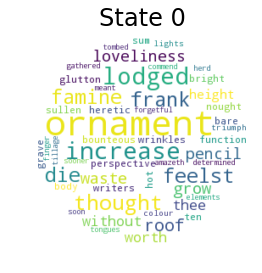

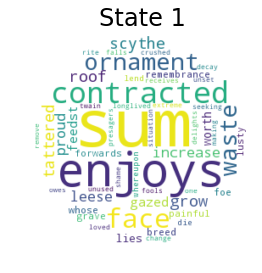

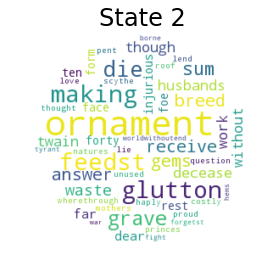

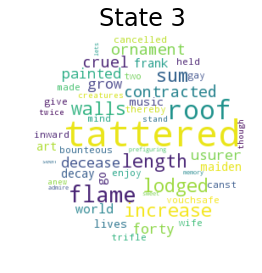

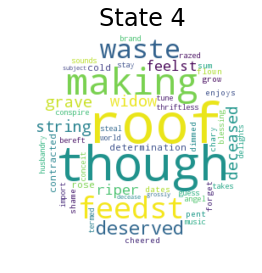

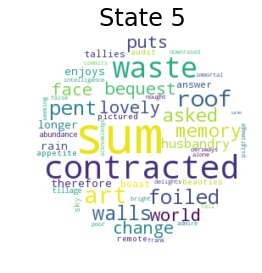

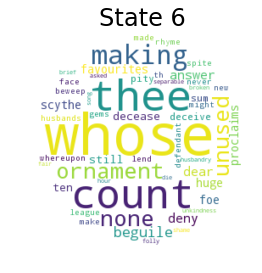

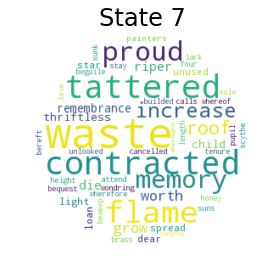

In [7]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

txtflat = ''
for liste in txt:
    txtflat += liste

obs, obs_map = parse_observations(txtflat)
wordclouds = states_to_wordclouds(HMM, obs_map)

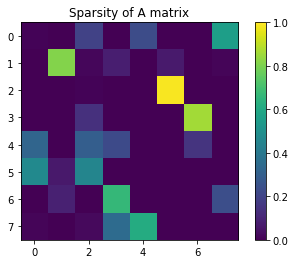

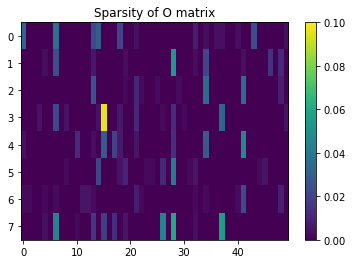

In [8]:
visualize_sparsities(HMM, O_max_cols=50)


Animating...


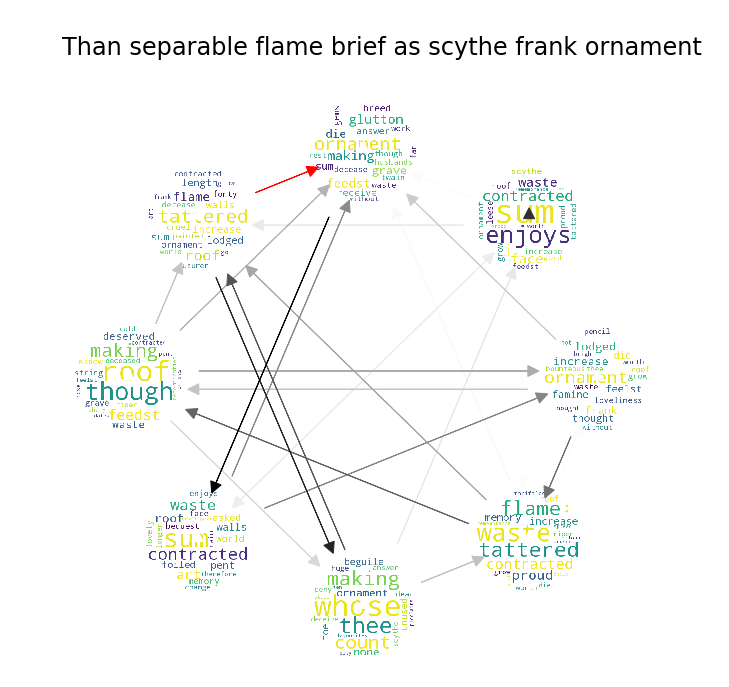

In [9]:
anim = animate_emission(HMM, obs_map, M=8)
HTML(anim.to_html5_video())

In [4]:
print(son_words)

[]


In [52]:
import curses
from curses.ascii import isdigit 
import nltk
from nltk.corpus import cmudict 
d = cmudict.dict()

def nsyl(word):
     print([len(list(y for y in x if isdigit(y[-1]))) for x in d[word.lower()]] )

nsyl('red')

[1]


In [ ]:
def generate_emission(self, M):
        '''
        Generates an emission of length M, assuming that the starting state
        is chosen uniformly at random. 

        Arguments:
            M:          Length of the emission to generate.

        Returns:
            emission:   The randomly generated emission as a list.

            states:     The randomly generated states as a list.
        '''

        emission = []
        state = random.choice(range(self.L))
        states = []

        remSyl = M
        while(true):
            # Append state.
            states.append(state)

            while(true):
                # Sample next observation.
                rand_var = random.uniform(0, 1)
                next_obs = 0

                while rand_var > 0:
                    rand_var -= self.O[state][next_obs]
                    next_obs += 1

                next_obs -= 1
                emission.append(next_obs)

            # Sample next state.
            rand_var = random.uniform(0, 1)
            next_state = 0

            while rand_var > 0:
                rand_var -= self.A[state][next_state]
                next_state += 1

            next_state -= 1
            state = next_state

        return emission, states